/tmp/ipykernel_111338/3371974287.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar


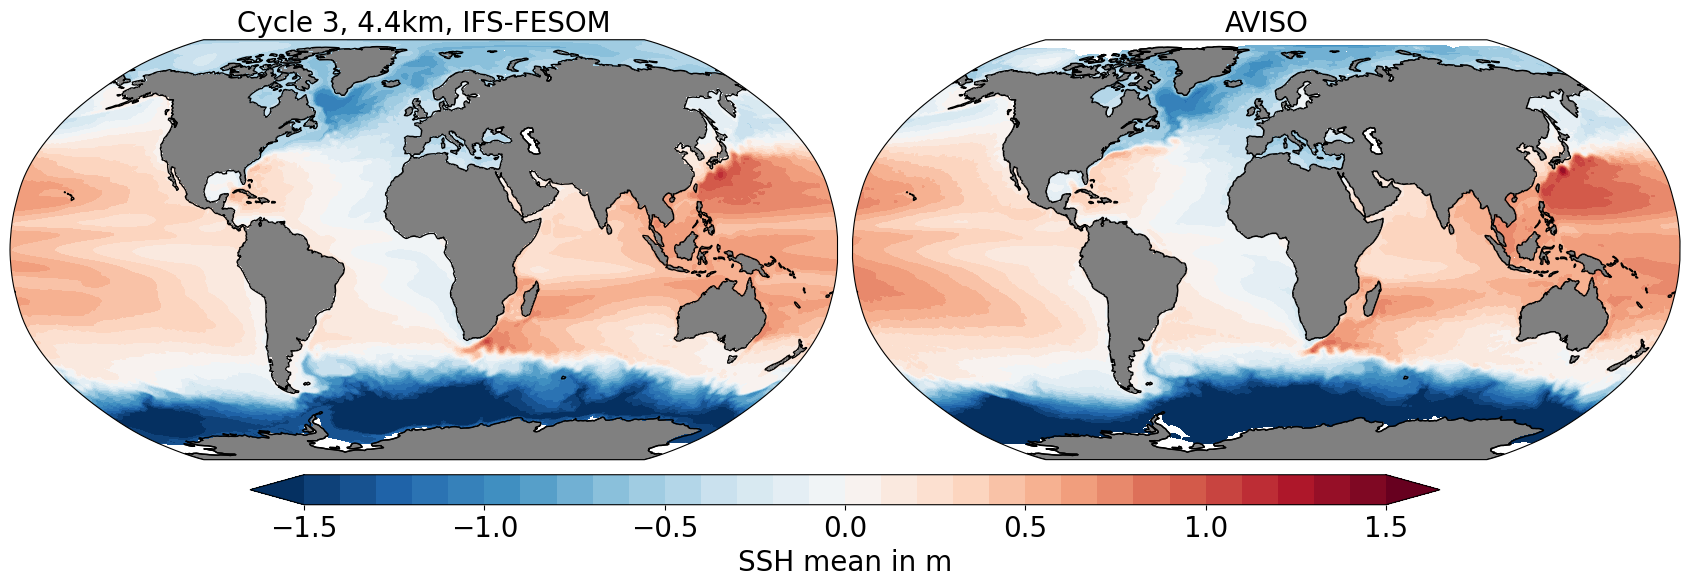

In [2]:
import pickle
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the variables from the pickle file
with open('ssh_mean.pkl', 'rb') as f:
    sshm_yr_mean_anomaly, ssh_yr_mean_anomaly = pickle.load(f)

# Create the figure
fig = plt.figure(figsize=(17, 15))

# First subplot
ax1 = fig.add_subplot(121, projection=ccrs.Robinson())
p1 = sshm_yr_mean_anomaly.plot.contourf(
    ax=ax1,
    vmin=-1.5,
    center=0,
    vmax=1.5,
    levels=31,
    extend='both',
    cmap='RdBu_r',
    add_colorbar=False,
    transform=ccrs.PlateCarree(),
    robust=True
)
ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('Cycle 3, 4.4km, IFS-FESOM', fontsize=20)

# Second subplot
ax2 = fig.add_subplot(122, projection=ccrs.Robinson())
p2 = ssh_yr_mean_anomaly.plot.contourf(
    ax=ax2,
    vmin=-1.5,
    center=0,
    vmax=1.5,
    levels=31,
    extend='both',
    cmap='RdBu_r',
    add_colorbar=False,
    transform=ccrs.PlateCarree(),
    robust=True
)
ax2.coastlines()
ax2.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax2.set_title('AVISO', fontsize=20)

# Add a common colorbar
cbar_ax = fig.add_axes([0.15, 0.38, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(p1, cax=cbar_ax, extend='both', orientation='horizontal', ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5])
cbar.set_label('SSH mean in m', fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Adjust colorbar tick label font size

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar
plt.savefig("NextGEMS_Cycle3_AVISO_SSH_weighted_mean.png", bbox_inches='tight', dpi=400)
plt.show()
